In [296]:
# Initialize Otter
import otter
grader = otter.Notebook("assignment_5.ipynb")

# STK 353

## Assignment 5: Text Mining

### Total points: 35

- Submission deadline: 23:00, Friday 28 October 2021.
- This assignment is individual work.
- Some of the tests are hidden, and some are visible in order to guide you.
- The graphs will be manually assessed.
- **NB**: review_data1 will be used for Question 5 - 14

## Load the required packages

In [297]:
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, ImageColorGenerator
from nltk.corpus import stopwords
from PIL import Image

### Question 1 [2]

Consider the sample_text1 string given below. Use the Python regex (re) package to search and return the word 'Ontario' (case sensitive).

- Assign the pattern to the variable 'pat_1'
- Assign the regex search to the variable 'match_1'

<!--
BEGIN QUESTION
name: q1
points: 
    each: 1
-->

In [287]:
sample_text1 = 'I am a student from the University of Alabama. I \
was born in Ontario, Canada and I am a huge fan of the United\
States. I am going to get a degree in Philosophy to improve\
my chances of becoming a Philosophy professor. I have been\
working towards this goal for 4 years. I am currently enrolled\
in a PhD program. It is very difficult, but I am confident that\
it will be a good decision'

pat_1 = r'Ontario'
match_1 = re.search(pat_1,sample_text1)

print(pat_1)
print(match_1) #Hint: this should be an object

Ontario
<re.Match object; span=(61, 68), match='Ontario'>


In [5]:
grader.check("q1")

q1 results: All test cases passed!

### Question 2a [1]


Use the sample_text2 string given below. Use the Python regex (re) package to search and return the student number in the text.

- Assign the pattern to the variable 'pat_2a'
- Assign the regex search for the student number to the variable 'match_2a'

Hint: Pay close attention to the format of the student number.

<!--
BEGIN QUESTION
name: q2a
points: 
    each: 1
-->

In [298]:
sample_text2 = 'I am a student from the University of Pretoria.\
My student number is u12345678 and you can call me on 123-456-7890'

pat_2a = r'u[0-9]+'
match_2a = re.search(pat_2a,sample_text2)

In [30]:
grader.check("q2a")

q2a results: All test cases passed!

### Question 2b [1]

Use the sample_text2 from Question 2a. Use the Python regex (re) package to search and return the cellphone number in the text.

- Assign the pattern to the variable 'pat_2b'
- Assign the regex search for the cellphone number to the variable 'match_2b'

Hint: Pay close attention to the format of the cellphone number.

<!--
BEGIN QUESTION
name: q2b
points: 
    each: 1
-->

In [299]:
pat_2b = r'[0-9]{3}\-[0-9]{3}\-[0-9]{4}'
match_2b = re.search(pat_2b,sample_text2)

In [33]:
grader.check("q2b")

q2b results: All test cases passed!

### Question 3 [1]

Use the sample_text3 given below. Use the Python regex (re) package to find only email addresses that are valid. A valid email must have at least 2 characters before and 2 characters after the @ sign.

- Assign the pattern to the variable 'pat_3'
- Assign the regex search to the variable 'match_3' 

<!--
BEGIN QUESTION
name: q3
points: 
    each: 1
-->

In [300]:
sample_text3 = 'Hi my name is John and email address is john.doe@somecompany.co.uk and my friend\'s \
email is jane_doe124@gmail.com. But these are not valid emails: j@p and jj@p and j@pp'

pat_3 = r'[a-zA-Z][a-zA-Z0-9\.\_]+[\@][a-zA-Z]{2,}'
match_3 = re.findall(pat_3,sample_text3)

print(pat_3)
print(match_3)

[a-zA-Z][a-zA-Z0-9\.\_]+[\@][a-zA-Z]{2,}
['john.doe@somecompany', 'jane_doe124@gmail']


In [37]:
grader.check("q3")

q3 results: All test cases passed!

### Question 4a [1]

Use the sample_text4 given below. Use Python string methods to split the text into three separate sentences. 

- Assign the new list to the variable 'sent_list'

<!--
BEGIN QUESTION
name: q4a
points: 
    each: 1
-->

In [301]:
sample_text4 = 'We are attacking on their left flank but are losing many men.\
We cannot see the enemy army, nothing else to report.\
We are ready to attack but are waiting for your orders.'
sent_list = sample_text4.split('.',2)
print(sent_list)

['We are attacking on their left flank but are losing many men', 'We cannot see the enemy army, nothing else to report', 'We are ready to attack but are waiting for your orders.']


In [285]:
grader.check("q4a")

q4a results: All test cases passed!

### Question 4b [1]

Use the second sentence in 'sent_list' (Question 4 a) and split the sentence even further at the comma.

- Assign the new list to the variable 'new_list'

<!--
BEGIN QUESTION
name: q4b
points: 
    each: 1
-->

In [302]:
sent_list = sent_list[1]
new_list = sent_list.split(',')
print(new_list)

['We cannot see the enemy army', ' nothing else to report']


In [303]:
grader.check("q4b")

q4b results: All test cases passed!

The following questions are based on the review_data1.csv data set:

### Question 5 - Load the data [1]

The data can be found in 'review_data1.csv'

- Read the data into a dataframe and call it '**reviews**'
- Make the column 'review' a list and call it '**review_text**'
- Get the total number of reviews and call it '**review_num**'
- **Important**: Make sure review_data1.csv and wine1.png is saved in the **same** directory as your notebook.

**Note**: Pay attention to the variable names specified. It is important that you keep to the names specified.

<!--
BEGIN QUESTION
name: q5
points: 
    each: 0.5
-->

In [304]:
df = pd.read_csv('review_data1.csv')
reviews = pd.DataFrame(df)
review_text = reviews['review'].tolist()
review_num = review_text.__len__()
print(review_num)

264


In [305]:
grader.check("q5")

q5 results: All test cases passed!

### Question 6 - Extract the review date and time [2]

The reviews contain the date and time the review was made, for example 2017-09-23T02:53:08Z 

For the 7th review:

- Use regular expressions to find the date and time
- Assign the date, as a string, to the variable 'review_date_q6'
- Assign the time, as a string, to the variable 'review_time_q6', include the time separator and zero hour offset.

**Hint**: Pay close attention to the indexing of the reviews.

<!--
BEGIN QUESTION
name: q6
points: 
    each: 1
-->

In [306]:
date_p = r'20[0-9]{2}\-[0-9]{2}\-[0-9]{2}'
time_p = r'[0-9]{2}\:[0-9]{2}\:[0-9]{2}'
review_date_q6 = re.findall(date_p,review_text[6])
review_time_q6 = re.findall(time_p,review_text[6])
review_date_q6 = str(review_date_q6[0])
review_time_q6 = str(review_time_q6[0])
print(review_date_q6)
print(review_time_q6)

2017-09-06
04:49:34


In [34]:
grader.check("q6")

q6 results: All test cases passed!

### Question 7 - Remove the review date and time from the review [1]

This is the compliment of question 6. 

For the 16th review:

- Use regular expressions to find the date and time
- Remove the date and time from the review, as a string, and assign it to the variable 'review_content'
- Remove all leading and trailing whitespaces.
- Also remove the time separator and zero hour offset.

<!--
BEGIN QUESTION
name: q7
points: 
    each: 1
-->

In [307]:
dateAndTime = r'20[0-9]{2}\-[0-9]{2}\-[0-9]{2}T[0-9]{2}\:[0-9]{2}\:[0-9]{2}Z'
review_content = re.sub(dateAndTime,"",review_text[15])
review_content = review_content.strip()
print(review_content)

love it wouldnt mind drinking more


In [18]:
grader.check("q7")

q7 results: All test cases passed!

### Question 8 - Add reviews, date and time as columns in the data frame [3]

Repeat question 6 & 7 for **all** data points.

- Change the column 'review' to *not* contain the review date and time. 
    - Also strip the leading and trailing whitespaces
    - Remove the time separator and zero hour offset.
- Add a column 'review_date' containing the review date in the format 'YYYY-MM-DD'
- Add a column 'review_time' containing the review time in the format 'HH:MM:SS'

**Hint**: The columns 'review_date' and 'review_time' must *not* contain the time separator and zero hour offset.

<!--
BEGIN QUESTION
name: q8
points: 
    each: 1
-->

In [308]:
# reviews
d_p = r'^20[0-9]{2}\-[0-9]{2}\-[0-9]{2}' #date
t_p = r'[0-9]{2}\:[0-9]{2}\:[0-9]{2}' #Time
dateAndTime = r'20[0-9]{2}\-[0-9]{2}\-[0-9]{2}T[0-9]{2}\:[0-9]{2}\:[0-9]{2}Z'
size = 264
removed = []
review_date = []
review_time = []
for i in range(size):
    review_date.append(re.findall(d_p,str(reviews['review'][i]))[0])
    removed.append(str(re.sub(dateAndTime,"",str(reviews['review'][i]))).strip())
    review_time.append(re.findall(t_p,str(reviews['review'][i]))[0])
    
views = pd.DataFrame(list(removed))
review_date = pd.DataFrame(review_date) 
review_time = pd.DataFrame(review_time)

reviews['review'] = views[0]
reviews['review_date'] = review_date[0]
reviews['review_time'] = review_time[0]
reviews

,review,rating,review_date,review_time
0,It's really smooth but the taste isn't so good...,0,2017-09-02,07:00:09
1,Is ok..need more intense on flavor. I am a bit...,0,2017-08-05,04:28:58
2,I would give one more star if it came clean on...,0,2017-12-15,00:02:24
3,"Definitely not worth the hassle, don't waste y...",0,2018-01-02,20:20:01
4,"Absolutely love, love, love it!!",1,2017-09-20,01:18:35
...,...,...,...,...
259,Bought this for my parents. They said it was a...,0,2017-07-28,12:38:56
260,Best tasteing and defenetly the smoothest arou...,1,2017-09-20,01:18:35
261,"Not personally into pre made mixes, but bought...",1,2017-08-15,03:05:22
262,Taste Great portion,1,2017-09-20,01:18:35


In [203]:
grader.check("q8")

q8 results: All test cases passed!

### Question 9 - Remove noise [2]

Use python string methods and regular expressions to remove the following noise in the review column of the reviews data set,

- set the case of the data set to lower case.
- remove punctuation from the reviews.
- remove extra whitespaces from the reviews.
- Add a column 'clean_review' containing the clean, pre-processed reviews.

<!--
BEGIN QUESTION
name: q9
points: 
    each: 2
-->

In [309]:
review_text
size = 264
w = r'[^\w\s]'
d = []
t = []
for i in range(size):
    reviews['review'][i].lower()
    d.append(re.sub(w," ",str(reviews['review'][i])).lower())
    
clean_review = pd.DataFrame(d)
for i in range(size):
      clean_review[0][i]=re.sub(r' +',' ',str(clean_review[0][i]).strip())
reviews['clean_review'] = clean_review[0]
reviews

,review,rating,review_date,review_time,clean_review
0,It's really smooth but the taste isn't so good...,0,2017-09-02,07:00:09,it s really smooth but the taste isn t so good...
1,Is ok..need more intense on flavor. I am a bit...,0,2017-08-05,04:28:58,is ok need more intense on flavor i am a bit d...
2,I would give one more star if it came clean on...,0,2017-12-15,00:02:24,i would give one more star if it came clean on...
3,"Definitely not worth the hassle, don't waste y...",0,2018-01-02,20:20:01,definitely not worth the hassle don t waste yo...
4,"Absolutely love, love, love it!!",1,2017-09-20,01:18:35,absolutely love love love it
...,...,...,...,...,...
259,Bought this for my parents. They said it was a...,0,2017-07-28,12:38:56,bought this for my parents they said it was aw...
260,Best tasteing and defenetly the smoothest arou...,1,2017-09-20,01:18:35,best tasteing and defenetly the smoothest arou...
261,"Not personally into pre made mixes, but bought...",1,2017-08-15,03:05:22,not personally into pre made mixes but bought ...
262,Taste Great portion,1,2017-09-20,01:18:35,taste great portion


In [290]:
grader.check("q9")

q9 results: All test cases passed!

### Question 10 - Bag-of-Words vectorization [2]

- Use the CountVectorizer module from sklearn and define an instance matrix named 'matrix'
- Use the instance matrix to tokenize and count the word occurrences of the reviews. Assign this tokenization to the variable 'X'.
- From inspecting 'X', what is the vocabulary size? Assign this number to the variable 'vocab_size'
- From inspecting X, what is the total word count in the corpus? Assign this number to the variable 'word_count'

**Note**: Use the clean_review column.

<!--
BEGIN QUESTION
name: q10
points: 
    each: 1
-->

In [310]:
matrix = CountVectorizer()
X = matrix.fit_transform(reviews['clean_review'])
vocab_size = (matrix.vocabulary_.values()).__len__()
word_count = X.toarray()
word_count = word_count.sum(axis=0).sum()
print(vocab_size)

1850


In [320]:
grader.check("q10")

q10 results: All test cases passed!

### Question 11 - Get the word frequency [4]

Once fitted, use the feature indices

- Make a list of all of the unique words in the vocabulary. Call this list 'unique_words'
- What is the 118th word in 'unique_words'? Assign this to the variable 'word_118'
- What is the index of the word 'friend'? Assign this to the variable 'friend_index'

Remember, X is the bag-of-words representation of the corpus.
- Convert X to an array using the to_array function. Assign this array to 'X_array'
- Sum across the x-axis in order to get the word frequencies. Assign this list to the variable 'sum_words'
- What is the frequency of the word 'friend'? Assign this to the variable 'friend_freq'

**Note**: Use the clean_review column.  
**Hint**: Remember, Python indexing starts at 0.

<!--
BEGIN QUESTION
name: q11
points: 
    each: 1
-->

In [311]:
unique_words = list((matrix.get_feature_names()))
word_118 = unique_words[117]
friend_index = unique_words.index("friend")

X_array = X.toarray()
sum_words = X_array.sum(axis=0)
friend_freq = sum_words[friend_index]


In [350]:
grader.check("q11")

q11 results: All test cases passed!

### Question 12 - Write a function to find the top 15 non-stopword features in 'unique_words' [3]

- Function name: top_15_features  
- Input: review  
- Output: A list of tuples where the first tuple item is the word and the second tuple item is the frequency. Call this list 'top_15'

**Note**: Use the clean_review column. 

<!--
BEGIN QUESTION
name: q12
points: 
    each: 1
-->

In [316]:
def top_15_features():
    for i in range(264):
        word_tokens.append(word_tokenize(str(reviews['clean_review'][i])))
    flat_list = [item for sublist in word_tokens for item in sublist]
    stop_word = set(stopwords.words('english'))
    filtered_sentence = [w for w in flat_list if w not in stop_word]
    word_counter = Counter(filtered_sentence)
    top_15 = word_counter.most_common(15)
    return top_15
top_15 = top_15_features()

In [314]:
grader.check("q12")

q12 results: All test cases passed!

<!-- BEGIN QUESTION -->

### Question 13 - Plot the top 15 non-stopword features as a bar plot [3]

- Rotate the x-axis in order for the words not to overlap
- Provide an appropriate title

<!--
BEGIN QUESTION
name: q13
manual: true
points: 3
-->

In [1]:
top_15 = pd.DataFrame(top_15,columns = ['word','count'])
plt.bar(top_15['count'],top_15['word'])
plt.title("Top 15 non-stopword features")
plt.show()

NameError: name 'pd' is not defined

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 14a - Plot a wordcloud for review_0 [3]

- Plot a wordcloud for the review_0 data given below.
- Use the image 'wine1.png' to add a mask to each wordcloud
- Change the mask color to match the colors in the image (use the ImageColorGenerator module from the wordcloud package)
- Use randomstate = 13

**Note**: Use the clean_review column. 

<!--
BEGIN QUESTION
name: q14a
manual: true
points: 3
-->

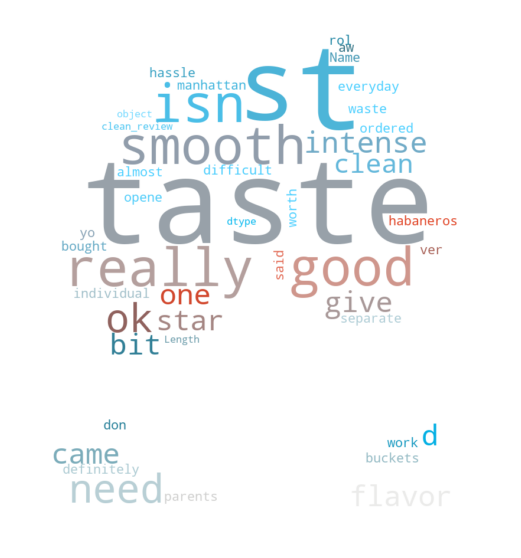

In [276]:
review_0 = (reviews['rating'] == 0)
review_0 = reviews[review_0]
review_0 = pd.DataFrame(review_0)
from wordcloud import ImageColorGenerator
pic = np.array(Image.open("wine1.png"))
wordcloud_sw = WordCloud(background_color = "white",mask = pic, random_state=13).generate(str(review_0['clean_review']))

image_colors = ImageColorGenerator(pic)

plt.figure(figsize = (10,10))
plt.imshow(wordcloud_sw.recolor(color_func=image_colors), interpolation = "bilinear")
plt.axis("off")
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 14b - Plot a wordcloud for review_1 [3]

- Plot a wordcloud for the review_1 data given below.
- Use the image 'wine1.png' to add a mask to each wordcloud
- Change the mask color to match the colors in the image (use the ImageColorGenerator module from the wordcloud package)
- Use randomstate = 13

**Note**: Use the clean_review column. 

<!--
BEGIN QUESTION
name: q14b
manual: true
points: 3
-->

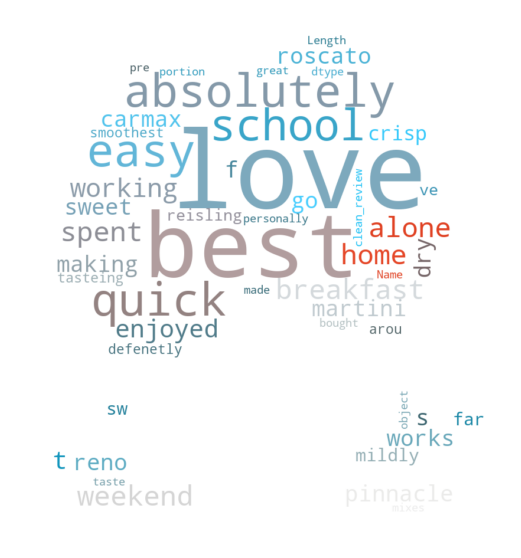

In [277]:
review_1 = (reviews['rating'] == 1)
review_1 = reviews[review_1]
review_1 = pd.DataFrame(review_1)

pic = np.array(Image.open("wine1.png"))
wordcloud_sw = WordCloud(background_color = "white",mask = pic, random_state=13).generate(str(review_1['clean_review']))

image_colors = ImageColorGenerator(pic)

plt.figure(figsize = (10,10))
plt.imshow(wordcloud_sw.recolor(color_func=image_colors), interpolation = "bilinear")
plt.axis("off")
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 14c [1]

- Use the wordclouds obtained in Question 14a and b and compare the information obtained from each wordcloud.

**Hint**: What do you notice?

<!--
BEGIN QUESTION
name: q14c
manual: true
points: 2
-->

Rating_1 the word "LOVE" is frequent and in Rating_0 the word "TASTE" is frequent.  

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [293]:
grader.check_all()

q1 results: All test cases passed!

q10 results: All test cases passed!

q11 results: All test cases passed!

q12 results: All test cases passed!

q2a results: All test cases passed!

q2b results: All test cases passed!

q3 results: All test cases passed!

q4a results: All test cases passed!

q4b results: All test cases passed!

q5 results: All test cases passed!

q6 results: All test cases passed!

q7 results: All test cases passed!

q8 results: All test cases passed!

q9 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [294]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)